In [180]:
#dependents
import requests
import json
from pprint import pprint
import pandas as pd
import numpy as np
import os
import csv
import matplotlib.pyplot as plt


#create imporsonment data url
Imprisonment_baseUrl = "https://api.ed.gov/data/mbk-imprisonment?"
Imprisonment_apiKey = "api_key=DTeVODnGRjLME8jd6PQCOy1DpgLqXPdHWtGO4EqA"
Imprisonment_perPage = "per_page=" + "195"
Imprisonment_url = Imprisonment_baseUrl + Imprisonment_apiKey + "&" + Imprisonment_perPage

#request and get data as "ImprisonmentData" through url
ImprisonmentData = requests.get(Imprisonment_url).json()



In [178]:
Imprisonment_length = len(ImprisonmentData["resources"])

#initialize lists for data pull from request
YearList = [] 
RaceEthnicityList = []
SexLists = []
CountList = []
CountPerCapitaList = []

#pull all data from requested data and put into lists for each column
for i in range (Imprisonment_length):
    YearList.append(int(ImprisonmentData["resources"][i]["Year"]))
    RaceEthnicityList.append(ImprisonmentData["resources"][i]["Race/ethnicity"])
    SexLists.append(ImprisonmentData["resources"][i]["Sex"])
    CountList.append(int(ImprisonmentData["resources"][i]["Count"]))
    CountPerCapitaList.append(int(ImprisonmentData["resources"][i]["Rate per 100,000"]))
        #YearList

#create dataframe and input all lists
imprisonmentDf = pd.DataFrame({
    "Year" : YearList,
    "Race/Ethnicity" : RaceEthnicityList,
    "Sex" : SexLists,
    "Count" : CountList,
    "Per Capita Rate per 100,000" : CountPerCapitaList
})

#show imporinment dataframe
imprisonmentDf.sort_values(by=["Year", "Race/Ethnicity"], ascending=True).head(16)

        


,Year,Race/Ethnicity,Sex,Count,"Per Capita Rate per 100,000"
52,2000,"Black, non-Hispanic",None,104880,2732
104,2000,"Black, non-Hispanic",Male,101521,5358
156,2000,"Black, non-Hispanic",Female,3500,180
65,2000,Hispanic,None,48696,1004
117,2000,Hispanic,Male,46949,1765
169,2000,Hispanic,Female,1596,73
78,2000,"Other race, non-Hispanic",None,15350,826
130,2000,"Other race, non-Hispanic",Male,14504,1557
182,2000,"Other race, non-Hispanic",Female,869,94
39,2000,"White, non-Hispanic",None,59129,345


In [147]:
#initilize race list
raceList = []
#populate race list with unique races
raceList = imprisonmentDf["Race/Ethnicity"].unique()
#show unique races
raceList

array([None, 'White, non-Hispanic', 'Black, non-Hispanic', 'Hispanic',
       'Other race, non-Hispanic'], dtype=object)

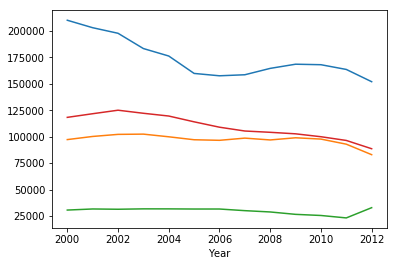

In [185]:
#IMPRISONMENTS COUNT PER RACE TOTAL COUNT
imprisonmentDf_yearSum_count = pd.DataFrame(imprisonmentDf.groupby(["Year", "Race/Ethnicity"])["Count"].sum())
imprisonmentDf_yearSum_count.unstack(level=-1).plot(kind="line", legend=False)#, xticks=imprisonmentDf_yearSum.index)
plt.show()

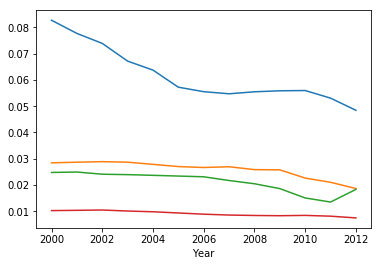

In [184]:
#IMPRISONMENTS COUNT PER RACE PER CAPITA
imprisonmentDf_yearSum_perCap = pd.DataFrame(imprisonmentDf.groupby(["Year", "Race/Ethnicity"])["Per Capita Rate per 100,000"].sum()/100000)
imprisonmentDf_yearSum_perCap.unstack(level=-1).plot(kind="line", legend=False)#, xticks=imprisonmentDf_yearSum.index)
plt.show()

In [162]:
imprisonmentDf_yearSum.unstack(level=-1).head()


Per Capita Rate per 100,000                                    \
Race/Ethnicity         Black, non-Hispanic Hispanic Other race, non-Hispanic   
Year                                                                           
2000                               0.08270  0.02842                  0.02477   
2001                               0.07768  0.02868                  0.02493   
2002                               0.07389  0.02888                  0.02410   
2003                               0.06714  0.02868                  0.02394   
2004                               0.06372  0.02786                  0.02368   

                                    
Race/Ethnicity White, non-Hispanic  
Year                                
2000                       0.01025  
2001                       0.01036  
2002                       0.01048  
2003                       0.01009  
2004                       0.00981

In [192]:
#ATTEMPT TO USE MATPLOTLIB, WORK ON NEXT TIME
imprisonmentDf_yearSum_test = pd.DataFrame(imprisonmentDf.groupby(["Year", "Race/Ethnicity"])["Count"].sum())
imprisonmentDf_yearSum_test
imprisonmentDf_yearSum_plotData = imprisonmentDf_yearSum_test.unstack(level=-1)#.plot(kind="line", legend=False)#, xticks=imprisonmentDf_yearSum.index)
imprisonmentDf_yearSum_plotData

#imprisonmentDf_yearSum_plotData.plot("Year","Count")
#plt.scatter(
 #   urbanDataDf["number of rides"], urbanDataDf["average fare"], s=urbanDataDf["driver_count"]*10, 
  #  color = "coral", alpha=0.8, edgecolors="black", linewidth=1

       Race/Ethnicity            Year
Count  Black, non-Hispanic       2000    209901
                                 2001    202851
                                 2002    197599
                                 2003    183179
                                 2004    176131
                                 2005    159697
                                 2006    157468
                                 2007    158443
                                 2008    164465
                                 2009    168401
                                 2010    167926
                                 2011    163458
                                 2012    151890
       Hispanic                  2000     97241
                                 2001    100203
                                 2002    102168
                                 2003    102401
                                 2004     99885
                                 2005     97100
                                 2006     96559
  

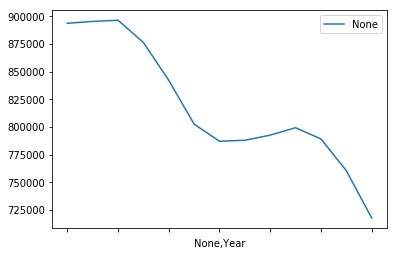

In [171]:
#IMPRISONMENTS TOTAL COUNT FOR ALL RACES AND ALL GENDERS

imprisonmentDf_yearSum_count = pd.DataFrame(imprisonmentDf.groupby(["Year"])["Count"].sum())
imprisonmentDf_yearSum_count.unstack(level=-1).plot(kind="line", legend=True)#, xticks=imprisonmentDf_yearSum.index)

